In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

### FashoinMNIST data 불러오기

In [3]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [5]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [6]:
type(train_images)

numpy.ndarray

In [7]:
# training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [8]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화하기

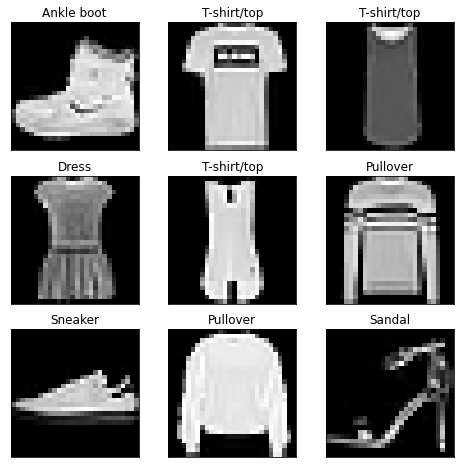

In [10]:
plt.figure(figsize = (8,8))

for i in range(9) :
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    
plt.show()

### Data 전처리

In [12]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
# 픽셀값이 0~255 이기 때문에 255로 나누어 값 생성 
train_image = train_images.astype(np.float32) / 255.
test_image = test_images.astype(np.float32) / 255.

# one-hot encoding 
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [13]:
print(train_image , train_labels)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[0. 0. 0.

### Dataset 만들기

In [14]:
# from_tensor_slices - numpy 배열이 있고 그걸 tensorflow로 넣는 작업 
# 데이터를 특성(feature)과 라벨(label)로 나누어 사용하는 경우 아래와 같이 
# batch 학습 시 이미지가 여러개가 한번에 들어가게 되는데 몇개 씩 넣어줄 건지 정해주는 것 
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


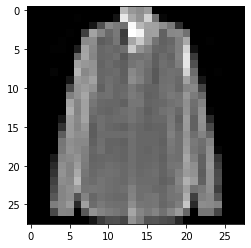

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {lb}")

### Custom Dataset 만들기

In [16]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
    print (x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [17]:
# data 전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [19]:
for _ in range(3) :
    for x in ds_tensors :
        print(x)
    print('='*50)

tf.Tensor([ 0 49], shape=(2,), dtype=int64)
tf.Tensor([ 9 36], shape=(2,), dtype=int64)
tf.Tensor([81 16], shape=(2,), dtype=int64)
tf.Tensor([25 64], shape=(2,), dtype=int64)
tf.Tensor([4 1], shape=(2,), dtype=int64)
tf.Tensor([ 4 81], shape=(2,), dtype=int64)
tf.Tensor([16  9], shape=(2,), dtype=int64)
tf.Tensor([25 49], shape=(2,), dtype=int64)
tf.Tensor([0 1], shape=(2,), dtype=int64)
tf.Tensor([36 64], shape=(2,), dtype=int64)
tf.Tensor([64 49], shape=(2,), dtype=int64)
tf.Tensor([ 4 36], shape=(2,), dtype=int64)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor([ 9 25], shape=(2,), dtype=int64)
tf.Tensor([16 81], shape=(2,), dtype=int64)


## Model

### Keras Sequential API 사용

In [20]:
def create_seq_model():
    model = keras.Sequential()
    # Flatten, 멀리레이어를 1차원 벡터로 변환 
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(128, activation='relu'))
    # Dropout, 오버피팅 제어 
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [21]:
seq_model = create_seq_model()

In [22]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Keras Functional API 사용

In [23]:
def create_func_model():
    inputs = keras.Input(shape=(28,28))
    flatten = keras.layers.Flatten()(inputs)
    dense = keras.layers.Dense(128, activation='relu')(flatten)
    drop = keras.layers.Dropout(0.2)(dense)
    outputs = keras.layers.Dense(10, activation='softmax')(drop)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [24]:
func_model = create_func_model()

In [25]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Class Subclassing 사용

In [26]:
class SubClassModel(keras.Model):
    def __init__(self):
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.drop = keras.layers.Dropout(0.2)
        self.dense2 = keras.layers.Dense(10, activation='softmax')
    def call(self, x, training=False):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop(x)
        return self.dense2(x)

In [27]:
subclass_model = SubClassModel()

In [28]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  100480    
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 가상의 data 만들어서 예측해보기
inputs = tf.random.normal((1, 28, 28))
outputs = subclass_model(inputs)
pred = tf.argmax(outputs, -1)
print(f"Predicted class: {pred}")

Predicted class: [4]


## Traing / Validation

### Keras API 사용

In [27]:
learning_rate = 0.001
seq_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate),
                    loss = 'categorical_crossentropy',
                    metrics =['accuracy'])

In [30]:
history = seq_model.fit(train_dataset , epochs=  10 , validation_data = test_dataset)

Epoch 1/10
938/938 [==============================] - 12s 10ms/step - loss: 4.3288 - accuracy: 0.6085 - val_loss: 0.8691 - val_accuracy: 0.6734
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.9126 - accuracy: 0.6497 - val_loss: 0.7198 - val_accuracy: 0.7212
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.7948 - accuracy: 0.6941 - val_loss: 0.6876 - val_accuracy: 0.7616
Epoch 4/10
938/938 [==============================] - 11s 11ms/step - loss: 0.7331 - accuracy: 0.7205 - val_loss: 0.6132 - val_accuracy: 0.7770
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.6803 - accuracy: 0.7449 - val_loss: 0.5978 - val_accuracy: 0.7984
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.6521 - accuracy: 0.7588 - val_loss: 0.6107 - val_accuracy: 0.7986
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.6547 - accuracy: 0.7596 - val_loss: 0.5705 - val_accuracy: 

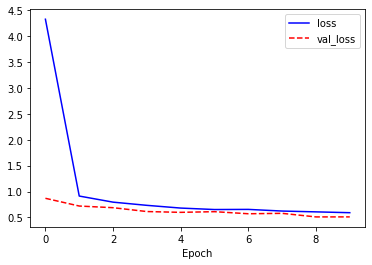

In [31]:
# plot losses 

plt.plot(history.history['loss'],'b-', label = 'loss')
plt.plot(history.history['val_loss'],'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

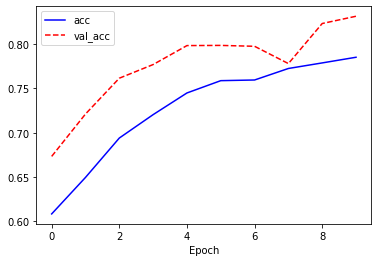

In [32]:
## Plot Accuracy
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### GradientTape 사용

In [33]:
# loss function

loss_object = keras.losses.CategoricalCrossentropy()

In [34]:
# optimizer 
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

In [35]:
# loss , accuracy 계산 

train_loss = keras.metrics.Mean(name = 'train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name = 'train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [40]:
@tf.function # 데코레이터 속도를 높여주기 위해

def train_step(model, images, labels) :
 with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
 gradients = tape.gradient(loss, model.trainable_variables)
 optimizer.apply_gradients(zip(gradients, model.trainable_variables))

 train_loss(loss)
 train_accuracy(labels, predictions)

In [41]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [42]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)

  for test_images, test_labels in test_dataset:
    test_step(func_model, test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 4.0126633644104, Accuracy: 62.22833251953125, Test Loss: 0.826589047908783, Test Accuracy: 68.47000122070312
Epoch 2, Loss: 0.8513519763946533, Accuracy: 67.22833251953125, Test Loss: 0.7382464408874512, Test Accuracy: 71.93000030517578
Epoch 3, Loss: 0.7351130843162537, Accuracy: 72.59166717529297, Test Loss: 0.6402825117111206, Test Accuracy: 76.52000427246094
Epoch 4, Loss: 0.6679299473762512, Accuracy: 74.42166900634766, Test Loss: 0.5724889039993286, Test Accuracy: 79.69000244140625
Epoch 5, Loss: 0.6308379173278809, Accuracy: 75.84833526611328, Test Loss: 0.5486971735954285, Test Accuracy: 81.1100082397461
Epoch 6, Loss: 0.6257153153419495, Accuracy: 76.56666564941406, Test Loss: 0.5175210237503052, Test Accuracy: 81.66000366210938
Epoch 7, Loss: 0.6168609261512756, Accuracy: 76.68000030517578, Test Loss: 0.5435712337493896, Test Accuracy: 80.8800048828125
Epoch 8, Loss: 0.6177356839179993, Accuracy: 76.54666900634766, Test Loss: 0.6138946413993835, Test Accuracy: 

## Model 저장하고 불러오기

### parameter 만 저장하고 불러오기 

In [43]:
seq_model.save_weights('seq_model.ckpt')

In [44]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 8ms/step - loss: 320.3085 - accuracy: 0.0886


[320.3084716796875, 0.08860000222921371]

In [46]:
seq_model_2.load_weights('seq_model.ckpt')

In [47]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 8ms/step - loss: 0.5100 - accuracy: 0.8315


[0.5099893808364868, 0.8315000534057617]

### Model 전체를 저장하고 불러오기

In [48]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model/assets


In [49]:
!ls

Affine_Functions.ipynb
Binary_Classifiers.ipynb
Dense_Layers.ipynb
Model_Implementation_with_Dense_Layers.ipynb
Pytorch.ipynb
TensorFlow_Keras.ipynb
TensorFlow_Keras_Using_Data.ipynb
checkpoint
seq_model
seq_model.ckpt.data-00000-of-00001
seq_model.ckpt.index


In [50]:
seq_model_3 = keras.models.load_model('seq_model')

In [51]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 1s 8ms/step - loss: 0.5100 - accuracy: 0.8315


[0.5099893808364868, 0.8315000534057617]

### Tensorboard 사용하여 시각화하기

In [52]:
%load_ext tensorboard

### Keras Callback 사용

In [53]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
new_model_1.evaluate(test_dataset)

157/157 [==============================] - 2s 9ms/step - loss: 320.3085 - accuracy: 0.0886


[320.3084716796875, 0.08860000222921371]

In [55]:
log_dir = './logs/new_model_1'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [56]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset,
          callbacks=[tensorboard_cb])

Epoch 1/10
938/938 [==============================] - 12s 13ms/step - loss: 4.5496 - accuracy: 0.6175 - val_loss: 0.8282 - val_accuracy: 0.6872
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.8941 - accuracy: 0.6531 - val_loss: 0.6929 - val_accuracy: 0.7392
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.7687 - accuracy: 0.7058 - val_loss: 0.6481 - val_accuracy: 0.7805
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.7074 - accuracy: 0.7332 - val_loss: 0.6061 - val_accuracy: 0.7915
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6726 - accuracy: 0.7458 - val_loss: 0.5581 - val_accuracy: 0.8143
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.6470 - accuracy: 0.7540 - val_loss: 0.5792 - val_accuracy: 0.8054
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.6468 - accuracy: 0.7551 - val_loss: 0.5451 - val_accuracy:

In [ ]:
%tensorboard --logdir $log_dir

### Summary Writer 사용

In [57]:
new_model_2 = create_seq_model()

In [58]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [59]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [60]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [61]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [62]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [63]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(new_model_2, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  for test_images, test_labels in test_dataset:
    test_step(new_model_2, test_images, test_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

In [ ]:
%tensorboard --logdir 'logs/gradient_tape'